### Code Excercise on Softmaxt Regression

- Following example from [this post](https://medium.com/@awjuliani/simple-softmax-in-python-tutorial-d6b4c4ed5c16)

In [1]:
# Import libraries. Basic libraries like pandas, numpy have been loaded during initialization
from sklearn import datasets
images, digits = datasets.load_digits(return_X_y=True)

Text(0.5, 1.0, 'Image for 7')

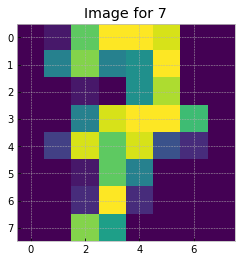

In [2]:
# pick onenumber for example
idx = np.random.randint(0, len(digits))
plt.imshow(images[idx,:].reshape(8, 8))
plt.title(f'Image for {digits[idx]}')

In [3]:
class softmax_regression():
    
    def __init__(self, lr=1e-5, n_iter=1000, lam=1):
        self.lr = lr
        self.n_iter = n_iter
        self.lam = lam
    
    # utitily function that turns a list of labels into one-hot matrix
    def one_hot(self, labels):
        num_labels = labels.shape[0]
        num_classes = len(np.unique(labels))
        index_offset = np.arange(num_labels) * num_classes
        labels_one_hot = np.zeros((num_labels, num_classes))
        labels_one_hot.flat[index_offset + labels.ravel()] = 1
        return labels_one_hot
    
    # softmax function
    def softmax(self, z):
        # subtract max to prevent overflow
        z -= np.max(z)
        #sm = 1 / (1 + np.exp(-z))
        sm = (np.exp(z).T / np.sum(np.exp(z),axis=1)).T
        return sm
    
    # loss function & gradient
    def loss(self, X, y_mat): 
        N, D = X.shape
        Z = X.dot(self.W)
        prob = self.softmax(Z)
        loss = (-1 / N) * np.sum(y_mat * np.log(prob)) + (self.lam / 2) * np.sum(self.W * self.W)
        grad = (-1 / N) * X.T.dot((y_mat - prob)) + self.lam * self.W
        return loss, grad
        
    def predict(self, X):
        probs = self.softmax(X.dot(self.W))
        preds = np.argmax(probs, axis = 1)
        return preds
        
    def fit(self, X, y):
        y_mat = self.one_hot(y)
        N, D = X.shape
        self.W = np.zeros((X.shape[1], len(np.unique(y))))
        self.losses = np.zeros(self.n_iter)
        for i in range(self.n_iter):
            loss, grad = self.loss(X, y_mat)
            self.losses[i] = loss
            self.W -= self.lr * grad

In [4]:
## test results

SM = softmax_regression(n_iter=10000)
SM.fit(images, digits)
test_results = SM.predict(images)

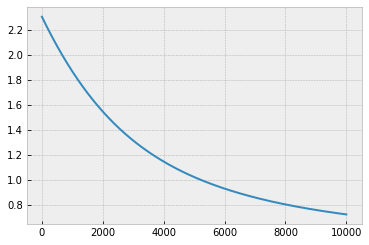

In [5]:
plt.plot(SM.losses)

In [6]:
from sklearn.metrics import classification_report

print(classification_report(digits, test_results))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       178
           1       0.83      0.85      0.84       182
           2       0.95      0.93      0.94       177
           3       0.98      0.91      0.94       183
           4       0.98      0.94      0.96       181
           5       0.93      0.94      0.94       182
           6       0.97      0.97      0.97       181
           7       0.90      0.98      0.94       179
           8       0.88      0.79      0.83       174
           9       0.82      0.90      0.86       180

   micro avg       0.92      0.92      0.92      1797
   macro avg       0.92      0.92      0.92      1797
weighted avg       0.92      0.92      0.92      1797



In [7]:
## reference using sklearn logistic regression

from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(C=2)
LR.fit(images, digits)
sk_results = SM.predict(images)
print(classification_report(digits, sk_results))

C:\Users\rzhang\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rzhang\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


              precision    recall  f1-score   support

           0       0.98      0.99      0.99       178
           1       0.83      0.85      0.84       182
           2       0.95      0.93      0.94       177
           3       0.98      0.91      0.94       183
           4       0.98      0.94      0.96       181
           5       0.93      0.94      0.94       182
           6       0.97      0.97      0.97       181
           7       0.90      0.98      0.94       179
           8       0.88      0.79      0.83       174
           9       0.82      0.90      0.86       180

   micro avg       0.92      0.92      0.92      1797
   macro avg       0.92      0.92      0.92      1797
weighted avg       0.92      0.92      0.92      1797



In [8]:
LR.coef_

array([[ 0.00000000e+00, -5.22479941e-02, -3.96706785e-02,
         4.95953072e-02, -1.07637995e-01, -4.24795069e-01,
        -3.13265374e-01, -3.19558492e-02, -9.92603597e-06,
        -1.27766568e-01, -1.23657899e-02,  2.07448931e-01,
         2.43238094e-01,  3.14792505e-01,  5.99289757e-03,
        -3.59978221e-02, -6.30216870e-03,  1.13613834e-01,
         2.44071861e-01, -7.29410028e-02, -4.32221461e-01,
         3.50494373e-01, -1.94997496e-02, -1.62121182e-02,
        -3.14985704e-03,  2.09058257e-02, -9.39211309e-02,
        -1.86672273e-01, -7.21991849e-01,  3.56666478e-02,
         4.76577350e-02, -1.17501457e-04,  0.00000000e+00,
         3.03770242e-01,  1.77673732e-01, -1.45128820e-01,
        -7.13250293e-01, -6.04888463e-02, -7.65464294e-02,
         0.00000000e+00, -1.84622858e-03, -2.81183588e-02,
         2.42038253e-01, -3.36334508e-01, -3.19470290e-01,
         9.31482125e-03,  1.63847968e-01, -6.97429967e-05,
        -9.14997050e-04, -1.52453477e-01,  2.61533206e-0

In [9]:
SM.W.T

array([[ 0.00000000e+00, -1.23687948e-03, -4.42935391e-03,
         6.86955976e-03, -3.00218821e-03, -1.50232036e-02,
        -6.65965941e-03, -6.66153367e-04, -2.38383212e-05,
        -5.30328942e-03,  9.01749590e-03,  7.60113933e-03,
         9.15713136e-03,  1.70751360e-02, -4.51534676e-03,
        -6.27591257e-04, -1.52718359e-05,  5.11020783e-03,
         1.76175819e-02, -6.95106793e-03, -2.18804196e-02,
         2.22917318e-02,  7.86872115e-03, -2.82321425e-04,
        -5.92251324e-06,  1.32852964e-02,  1.43653945e-02,
        -3.36021636e-02, -4.88193586e-02,  4.50619070e-03,
         2.02326701e-02, -1.96512862e-05,  0.00000000e+00,
         1.70020231e-02,  1.89902669e-02, -3.84882445e-02,
        -4.93526699e-02, -4.20124827e-03,  1.96425443e-02,
         0.00000000e+00, -7.53229769e-05,  8.20602630e-03,
         3.19652145e-02, -2.50051502e-02, -2.77992023e-02,
         1.10352165e-02,  8.91230200e-03, -1.28247826e-04,
        -1.04789914e-04, -6.06464484e-04,  2.56513677e-0